<a href="https://colab.research.google.com/github/AlexeyBudarov/Test_VK_task.-Binary_classification/blob/main/Test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from scipy import stats
matplotlib.style.use('ggplot')
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
df = pd.read_csv('trainee_train.csv')
target = df['im']
# df = df.drop(['Unnamed: 0', 'im'], axis = 1)
df = df.drop(['Unnamed: 0'], axis = 1)
columns = df.columns

In [ ]:
print(sum(target) / len(target))

0.7175324675324676


In [ ]:
for k in np.unique(target):
  plt.plot

### Загрузка и анализ данных


Получаем статистические данные

In [ ]:
def get_statistic_distribution(v_start, v_end, flag = 'values'):

  if v_start < 1 or v_end > 446: return 'Incorrect input values'
  std_array = []
  median_array = []
  min_array = []
  max_array = []
  mean_array = []

  for i in range(v_start - 1, v_end):
    # print(f"Columns - {columns[i]}: {df[col].describe()}")
    # print(f"Columns - {columns[i]}: Max_val {max(df[col])}, Min_val {min(df[col])}")
    std_array.append(df[columns[i]].std())
    median_array.append(df[columns[i]].median())
    min_array.append(min(df[columns[i]]))
    mean_array.append(df[columns[i]].mean())
    max_array.append(max(df[columns[i]]))

  if flag == 'plot_st_func':
    x_val = np.arange(v_start - 1, v_end)
    plt.plot(x_val, min_array, label = 'Min_values')
    plt.plot(x_val, mean_array, label = 'Mean_values')
    plt.plot(x_val, max_array, label = 'Max_values')
    plt.plot(x_val, median_array, label = 'Median_values')
    plt.grid(True)
    plt.legend()
    plt.show()
    return 0


  else:
    corrcoef_array = [[] for _ in range(len(columns))]
    for i in range(len(columns)):
      for j in range(i+1, len(columns) - 1):
        corrcoef_array[i].append(np.corrcoef(df[columns[i]], df[columns[j]])[0][1])
    return min_array, mean_array, median_array, max_array, std_array, corrcoef_array


In [ ]:
start, end = 30, 53

In [ ]:
get_statistic_distribution(start, end, 'plot_st_func')

In [ ]:
min_array, mean_array, median_array, max_array, std_array, corrcoef_array = get_statistic_distribution(start, end)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(min_array, edgecolor='black', color = 'grey')
axes[0].set_title('Min_values')
axes[1].hist(max_array, edgecolor='black')
axes[1].set_title('Max_values')
plt.tight_layout()
plt.show()

In [ ]:
plt.hist(std_array, bins = 15, edgecolor = 'black')
plt.show()

In [ ]:
print(max_array[5], min_array[5])

136.222222222222 126.042979942693


In [ ]:
x_val = np.arange(len(std_array))
plt.plot(x_val, std_array, label = 'Std_values')
plt.grid(True)
plt.legend()
plt.show()

Классы несбалансированы. Что с этим делать?

In [ ]:
plt.hist(target, bins = 3, edgecolor = 'black')
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [ ]:
testing_features = [f"v{i}" for i in range(1,20)]
correlation_matrix = df[testing_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

Есть подозрения, что два подряд идущих сильно коррелирующих признаков стоят через каждые 5, и 10 признаков (чередуются) Может быть такое, что такие признаки имеют одну и ту же природу? Из одного распределения?

Видимо, нет

In [ ]:
def density_plot(df, features):
  if len(features) > 5: return 'Incorrect inputs'

  f1,f2,f3,f4,f5 = features
  sns.kdeplot(df[f1], label=f"Feature {f1}", shade=True)
  sns.kdeplot(df[f2], label=f"Feature {f2}", shade=True)
  sns.kdeplot(df[f3], label=f"Feature {f3}", shade=True)
  sns.kdeplot(df[f4], label=f"Feature {f4}", shade=True)
  sns.kdeplot(df[f5], label=f"Feature {f5}", shade=True)

  plt.xlabel("Feature Value")
  plt.ylabel("Density")
  plt.title("Feature Distributions")
  plt.legend()
  plt.show()
density_plot(df, columns[250:255])

Дальше - как то объединить найни пары сильно коррелирующих признаков

In [ ]:
correlation_more_09 = []
correlation_08_09 = []
correlation_07_08 = []
correlation_05_07 = []
suspicious_features = []
for i, corr_feature in enumerate(corrcoef_array):
  for j, coeff in enumerate(corr_feature):
    if coeff >= 0.9:
      correlation_more_09.append((f'v{i + 1}', f'v{i + j + 2}'))
      if i + 1 == i + j + 2 - 1:
        suspicious_features.append((f'v{i + 1}', f'v{i + j + 2}'))
    elif  0.9 > coeff >= 0.8:
      correlation_08_09.append((f'v{i + 1}', f'v{i + j + 2}'))
    elif 0.8 > coeff >= 0.7:
      correlation_07_08.append((f'v{i + 1}', f'v{i + j + 2}'))
    elif 0.7 > coeff >= 0.5:
      correlation_05_07.append((f'v{i + 1}', f'v{i + j + 2}'))

print(suspicious_features)


In [ ]:
def most_corr_features(correlation_array, flag = 'Feature with corr more 0.9'):
  temp_dict = {}
  for pair in correlation_array:
    if pair[0] not in temp_dict:
      temp_dict[pair[0]] = 1
    else:
      temp_dict[pair[0]] += 1

    if pair[1] not in temp_dict:
      temp_dict[pair[1]] = 1
    else:
      temp_dict[pair[1]] += 1
  if flag:
    plt.hist(list(temp_dict.values()), edgecolor = 'black')
    plt.title(flag)
    plt.show()
  else:
    sorted_values = sorted(list(temp_dict.items()), key = lambda x: x[1])
    return sorted_values


Распределение признаков по колличеству необходимых корруляций (1, 0.9], (0.9, 0.8], (0.8, 0.7]

In [ ]:
n = 5 # Вывести N штук
most_corr_features(correlation_more_09, 'Feature with corr more 0.9')
main_features_09 = most_corr_features(correlation_more_09, 0)[::-1]  # По возрастанию
print(f'Features: \n{main_features_09[:n]}\n\n')
most_corr_features(correlation_08_09, 'Feature with corr from 0.8 to 0.9')
main_features_08 = most_corr_features(correlation_08_09, 0)[::-1]
print(f'Features: \n{main_features_08[:n]}\n\n')
most_corr_features(correlation_07_08, 'Feature with corr from 0.7 to 0.8')
main_features_07 = most_corr_features(correlation_07_08, 0)[::-1]
print(f'Features: \n{main_features_07[:n]}')

In [ ]:
df.shape

Задачи на завтра:

Пропробовать различные способы нормировки данных ([**StandardScaler** ](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) ,[**PCA**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) with scaled inputs and no scaled inputs), **MinMaxScaler**, **RobustScaler**) Попробовать синтетическое расширение выборки **ADASYN** (Adaptive Synthetic Sampling) **SMOTE** (Synthetic Minority Over-sampling Technique)


+ Тестировать будем c помощью **K-fold, Stratified k-Fold** или еще попробовать выделить еще одно тестовое множество. (На одном будем искать гиперпараметры, на другом - оценивать качестов модели). + [Построение графиков кривой обучения](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html). Для визуализации [предсказанных классов](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html#sklearn.inspection.DecisionBoundaryDisplay.from_estimator)

 + Попробовать Leave-one-out cross-validation. Глянуть [статью](https://arxiv.org/pdf/1811.12808.pdf) Про Кросс-Валидацию

+ Поиск гиперпараметров - Кросс-валидация + GridSearchSV or RandomSV. Посмотреть [**Skite Optimize**](https://neptune.ai/blog/scikit-optimize) - может быть полезна

+ Почитать и реализовать ансамблирование алгоритмов. Бустинг, Беггинг и тд

## Создание обучающей выборки



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
def get_train_test_data(df, target, scaler = None, test_size_ = 0.2):
  if df.shape[0] != target.shape[0]:
    return 'Incorrenct input data. shape[0] target != shape[0] df'

  # Final preprocessing
  if scaler != None:
    class_weights = np.array([round(len(df) / (2*target.value_counts()[0]), 8), round(len(df) / (2*target.value_counts()[1]), 8)])
    sample_weights = [class_weights[int(label)] for label in target]
    X_all = scaler.fit_transform(df, target) # Посмотреть, когда лучше присваиваить веса для классов. Сейчас или в саму модель   , sample_weight= sample_weights
    X_train, X_test, y_train, y_test = train_test_split(X_all, target,test_size = test_size_, shuffle = True, random_state= 42, stratify = target)# Стратификация (сохранение соотношения классов на test и train)
    return pd.DataFrame(X_train), pd.DataFrame(X_test), pd.Series(y_train), pd.Series(y_test)

  else: #Ненормированные данные
    X_train, X_test, y_train, y_test = train_test_split(df, target,test_size = test_size_, shuffle = True, random_state= 42, stratify = target) #Потом может поменять random_state или test_size
    return X_train, X_test, y_train, y_test
# Теперь будем разбивать Train на K-фолдов и искать гиперпараметры.  (по сравнению с 1, 2 - изменил рамер тестовой выборки)

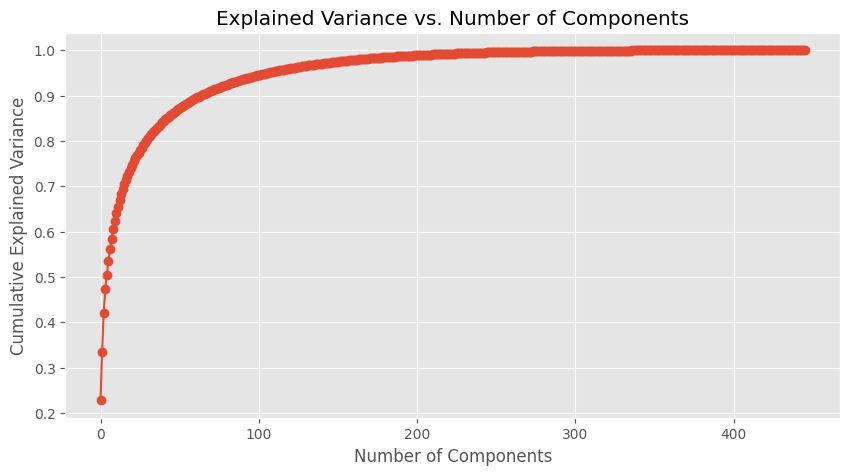

In [ ]:
from sklearn.decomposition import PCA
def plot_PCA(df):
  pca = PCA()
  pca.fit(df)

  explained_variance = pca.explained_variance_ratio_
  cumulative_explained_variance = explained_variance.cumsum()

  plt.plot(cumulative_explained_variance, marker='o')
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Explained Variance')
  plt.title('Explained Variance vs. Number of Components')
  plt.show()
plot_PCA(df)

In [ ]:
def get_train_test_with_PCA(df, n_components_):
  pca = PCA(n_components = n_components_)
  X = pca.fit_transform(df)
  return pd.DataFrame(X)

С нормировкой исходных данных

In [ ]:
scaler = StandardScaler()
# scaler = MinMaxScaler() # Все не работает
# scaler = RobustScaler()
test_size = 0.2
X_TRAIN, X_test, y_TRAIN, y_test = get_train_test_data(df, target, scaler, test_size)

С уменьшением размерности и нормировкой данных

In [ ]:
scaler = StandardScaler()
test_size = 0.2
n_components = 310
df_PCA = get_train_test_with_PCA(df, n_components)
X_TRAIN, X_test, y_TRAIN, y_test = get_train_test_data(df_PCA, target, scaler, test_size)

Исходные данные без нормировки

In [ ]:
test_size = 0.2
scaler = None
X_TRAIN, X_test, y_TRAIN, y_test = get_train_test_data(df, target, None, test_size)

С уменьшением размерности без нормировки



In [ ]:
test_size = 0.2
scaler = None
n_components = 200
df_PCA = get_train_test_with_PCA(df, n_components)

X_TRAIN, X_test, y_TRAIN, y_test = get_train_test_data(df_PCA, target, None, test_size)

In [ ]:
print(X_TRAIN.shape)
print(X_test.shape)
print(X_TRAIN)

(492, 200)
(124, 200)
           0          1          2          3          4          5    \
119 -18.644192  -8.003298  -4.197100   1.270981  -2.020620  -5.378676   
216 -13.215603 -12.712090   1.781385 -13.266474  -2.823017  10.544813   
267 -28.022018   0.492015  -2.468281  10.127457  -2.338967   5.561916   
530   0.294682 -10.404921 -17.754758  -4.317883  10.850278   0.312085   
545 -25.345301  -3.955974  -2.575802  -4.848304   4.562977   4.824523   
..         ...        ...        ...        ...        ...        ...   
305 -33.173781  -1.498818  -5.684973   5.268635   8.279502   0.209416   
464 -18.256548   7.664223   8.077165  12.828827 -11.926657  -0.621965   
19  -32.545986  -1.768015  -4.012125   3.536017   8.393794   3.402291   
136 -12.985572  -6.190424   1.226764  -9.707191  -5.210830  15.302008   
98   13.732861  -5.720085  25.980386   1.494519  10.120021  -0.104429   

           6          7         8         9    ...       190       191  \
119   1.028006 -11.867800 -

## Тестирование моделей

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.model_selection import GridSearchCV
def Get_best_params(X_TRAIN_, y_TRAIN_, model, params_grid, flag = 'KFold'):
  if flag == 'KFold':
    kf = KFold(n_splits = 5) # Мб покопаться в параметрах KFold
    grs = GridSearchCV(model, params_grid, cv = kf)
    grs.fit(X_TRAIN_, y_TRAIN_)
    best_params = grs.best_params_

    print(f"\n\n\n______________________{model}: best params - {best_params}_____________________\n\n\n")
    return best_params
  else:
    grs = GridSearchCV(model, params_grid)
    grs.fit(X_TRAIN_, y_TRAIN_)
    best_params = grs.best_params_
    print(f"\n\n\n______________________{model}: best params - {best_params}_____________________\n\n\n")
    return best_params

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

def KFold_train_process(X_TRAIN_, y_TRAIN_, model, flag = 'LeaveOneOut'):
  # Choose crose-validation. KFold, LeaveOneOut


  if flag != None:

    if flag == 'KFold':
      kf = KFold(n_splits = 5)
    elif flag == "LeaveOneOut":
      kf = LeaveOneOut()
    else:
      print('Incorrect inputs data')

    fold_scores = []
    for i, (train_index, test_index) in enumerate(kf.split(X_TRAIN_)):
      X_train, X_test = X_TRAIN_.iloc[train_index], X_TRAIN_.iloc[test_index]
      y_train, y_test = y_TRAIN_.iloc[train_index], y_TRAIN_.iloc[test_index]
      model.fit(X_train, y_train)
      preds = model.predict(X_test)

      if flag == 'KFold':
        score = roc_auc_score(y_test, preds)
        fold_scores.append(score)
      else:
        fold_scores.append(int(preds == y_test))

    if flag == 'KFold':
      print(f'\n\n______________________________{fold_scores}______________________________________\n\n')
      return model, np.array(fold_scores).mean()
    elif flag == 'LeaveOneOut':
      print('_______________________________', sum(fold_scores) / len(fold_scores), '___________________')
      return model, sum(fold_scores) / len(fold_scores)

  else:
    model.fit(X_TRAIN_, y_TRAIN_)
    preds = model.predict(X_TRAIN_)
    score = roc_auc_score(y_TRAIN_, preds)
    return model, score




def Testing_model(model, X_test_, y_test_):
  preds = model.predict(X_test_)
  score = roc_auc_score(y_test_, preds)
  return score

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

from tqdm.notebook import tqdm

In [ ]:
# Cross_validation = 'LeaveOneOut'
Cross_validation = 'KFold'
Cross_validation = None

In [ ]:
# Логистическая регрессия
logregr = LogisticRegression()
logregr_params = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [1, 1.5, 2], 'max_iter': [100, 150], "class_weight": ['balanced', None]}
best_logregr_params = Get_best_params(X_TRAIN, y_TRAIN, logregr, logregr_params)
logregr_with_params = LogisticRegression(**best_logregr_params)
LogRegr_trained, logreg_train_result = KFold_train_process(X_TRAIN, y_TRAIN, logregr_with_params, Cross_validation)
logreg_test_result = Testing_model(LogRegr_trained, X_test, y_test)

In [ ]:
# KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'kd_tree']}
best_knn_params = Get_best_params(X_TRAIN, y_TRAIN, knn, knn_params)
knn_with_params = KNeighborsClassifier(**best_knn_params)
knn_trained, knn_train_result = KFold_train_process(X_TRAIN,y_TRAIN, knn_with_params, Cross_validation)
knn_test_result = Testing_model(knn_trained, X_test, y_test)




______________________KNeighborsClassifier(): best params - {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}_____________________





In [ ]:
# Решаюшее дерево
tree = DecisionTreeClassifier()
tree_params = {'criterion': ['gini', 'entropy', 'log_loss'], "min_samples_split": [2, 4, 6], "class_weight": ['balanced', None]}
best_tree_params = Get_best_params(X_TRAIN, y_TRAIN, tree, tree_params)
tree_with_params = DecisionTreeClassifier(**best_tree_params)
tree_trained, tree_train_result = KFold_train_process(X_TRAIN,y_TRAIN, tree_with_params, Cross_validation)
tree_test_result = Testing_model(tree_trained, X_test, y_test)





______________________DecisionTreeClassifier(): best params - {'class_weight': None, 'criterion': 'entropy', 'min_samples_split': 2}_____________________





In [ ]:
# СВМ
svc = SVC()
svc_params = {'C': [0.5, 1, 1.5, 2], 'kernel': ['linear', 'poly', 'rbf'], "class_weight": ['balanced', None]} # Еще почитать про параметры SVC
best_svc_params = Get_best_params(X_TRAIN, y_TRAIN, svc, svc_params)
svc_with_params = SVC(**best_svc_params)
svc_trained, svc_train_result = KFold_train_process(X_TRAIN, y_TRAIN, svc_with_params, Cross_validation)
svc_test_result = Testing_model(svc_trained, X_test, y_test)





______________________SVC(): best params - {'C': 1.5, 'class_weight': None, 'kernel': 'rbf'}_____________________





In [ ]:
# Случайный лес
forest = RandomForestClassifier()
forest_params = {"n_estimators": [100, 150, 200], "criterion": ['gini', 'entropy', 'log_loss'], 'min_samples_split': [2, 4, 6], "class_weight": ['balanced', None]}
best_forest_params = Get_best_params(X_TRAIN, y_TRAIN, forest, forest_params)
forest_with_params = RandomForestClassifier(**best_forest_params)
forest_trained, forest_train_result = KFold_train_process(X_TRAIN, y_TRAIN, forest_with_params, Cross_validation)
forest_test_result = Testing_model(forest_trained, X_test, y_test)

In [ ]:
# Бэггинг
from sklearn.ensemble import BaggingClassifier
Cross_validation = None

bagging = BaggingClassifier()
# base_model_1 = LogisticRegression(**best_logregr_params)
base_model_2 = SVC(**best_svc_params)
base_model_3 = DecisionTreeClassifier(**best_tree_params)
bagging_params = {'estimator': [base_model_2, base_model_3],
                  "n_estimators" : [50, 100], "max_samples" : [0.5, 0.8], "max_features": [0.5, 0,8]}
best_bagging_params = Get_best_params(X_TRAIN, y_TRAIN, bagging, bagging_params, 'Ansamble')
bagging_with_params = BaggingClassifier(**best_bagging_params)
# Cross_validation = None??
bagging_trained, bagging_train_result = KFold_train_process(X_TRAIN, y_TRAIN, bagging_with_params, Cross_validation)
bagging_test_result = Testing_model(bagging_trained, X_test, y_test)

In [ ]:
# XGBoost
import xgboost as xgb
Cross_validation = None
myXgb = xgb.XGBClassifier()
myXgb_params = {'booster': ['gbtree', 'gblinear'], "objective": ["binary:logistic"], "eval_metric": ["logloss"], "random_state": [42] }
best_myXgb_params = Get_best_params(X_TRAIN, y_TRAIN, myXgb, myXgb_params, 'Ansamble')
myXgb_with_params = xgb.XGBClassifier(**best_myXgb_params)
myXgb_trained, myXgb_train_result = KFold_train_process(X_TRAIN, y_TRAIN, myXgb_with_params, Cross_validation)
myXgb_test_result = Testing_model(myXgb_trained, X_test, y_test)

In [ ]:
# pip install catboost

In [ ]:
# CatBoost
from catboost import CatBoostClassifier, Pool

train_pool = Pool(X_TRAIN, label=y_TRAIN)
test_pool = Pool(X_test, label=y_test)

model = CatBoostClassifier(iterations=50, depth=10, learning_rate=0.1, loss_function='Logloss', random_seed=42)
model.fit(train_pool, eval_set=test_pool, early_stopping_rounds=20, verbose=False)
y_pred = model.predict(X_TRAIN)
myCatboost_train_result = roc_auc_score(y_TRAIN, y_pred)
preds = model.predict(X_test)
myCatboost_test_result = roc_auc_score(y_test, preds)

In [ ]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier
# Стэккинг
base_models_1 = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ]

base_models_2 = [
    ('lgr', LogisticRegression(**best_logregr_params)),
    ('rf_2', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lgr_2', LogisticRegressionCV()),
    ('tree', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=120, random_state=42)),
]
meta_model_1 = LogisticRegression(**best_logregr_params)
meta_model_2 = SVC(**best_svc_params)
stacking_params = {'estimators': [base_models_1, base_model_2], 'final_estimator': [meta_model_1, meta_model_2]}

stacking_1 = StackingClassifier(estimators= base_models_1, final_estimator= meta_model_1)
stacking_2 = StackingClassifier(estimators= base_models_1, final_estimator= meta_model_2)
stacking_3 = StackingClassifier(estimators= base_models_2, final_estimator= meta_model_1)
stacking_4 = StackingClassifier(estimators= base_models_2, final_estimator= meta_model_2)
Cross_validation = None
stacking_trained_1, stacking_train_result_1 = KFold_train_process(X_TRAIN, y_TRAIN, stacking_1, None)
stacking_trained_2, stacking_train_result_2 = KFold_train_process(X_TRAIN, y_TRAIN, stacking_2, None)
stacking_trained_3, stacking_train_result_3 = KFold_train_process(X_TRAIN, y_TRAIN, stacking_3, None)
stacking_trained_4, stacking_train_result_4 = KFold_train_process(X_TRAIN, y_TRAIN, stacking_4, None)

stacking_test_result_1 = Testing_model(stacking_trained_1, X_test, y_test)
stacking_test_result_2 = Testing_model(stacking_trained_2, X_test, y_test)
stacking_test_result_3 = Testing_model(stacking_trained_3, X_test, y_test)
stacking_test_result_4 = Testing_model(stacking_trained_4, X_test, y_test)

print(f'Cross-Validation: {Cross_validation}, Test size : {test_size}, X_TRAIN shape: {X_TRAIN.shape}, scaler: {scaler} \n')
print(f'Stacking_1 Train result: {stacking_train_result_1}')
print(f'Stacking_1 Test result: {stacking_test_result_1}\n')
print(f'Stacking_2 Train result: {stacking_train_result_2}')
print(f'Stacking_2 Test result: {stacking_test_result_2}\n')
print(f'Stacking_3 Train result: {stacking_train_result_3}')
print(f'Stacking_3 Test result: {stacking_test_result_3}\n')
print(f'Stacking_4 Train result: {stacking_train_result_4}')
print(f'Stacking_4 Test result: {stacking_test_result_4}\n')

In [ ]:
print(f'Cross-Validation: {Cross_validation}, Test size : {test_size}, X_TRAIN shape: {X_TRAIN.shape}, scaler: {scaler} \n')

print(f'Bagging Train result: {bagging_train_result}')
print(f'Bagging Test result: {bagging_test_result}\n')
print(f'XGB Train result: {myXgb_train_result}')
print(f'XGB Test result: {myXgb_test_result}\n')
print(f'CatBoost Train result: {myCatboost_train_result}')
print(f'CatBoost Test result: {myCatboost_test_result}\n')
print(f'Stacking Train result: {stacking_train_result}')
print(f'Stacking Test result: {stacking_test_result}\n')

Cross-Validation: None, Test size : 0.2, X_TRAIN shape: (492, 446), scaler: None 

Bagging Train result: 0.9453909959850816
Bagging Test result: 0.7887640449438201

XGB Train result: 1.0
XGB Test result: 0.8290529695024077

CatBoost Train result: 1.0
CatBoost Test result: 0.8316211878009631



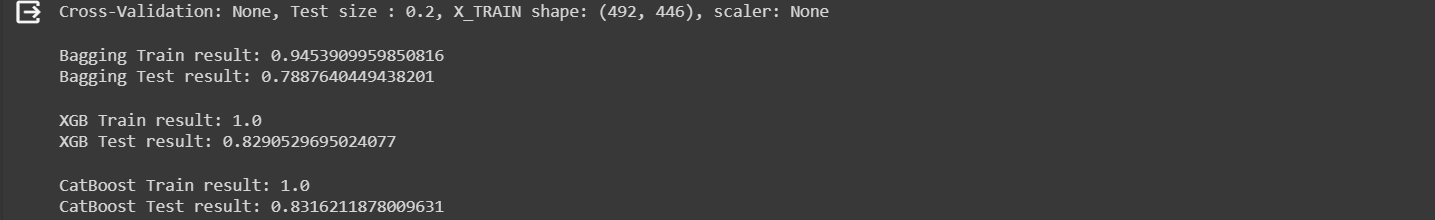

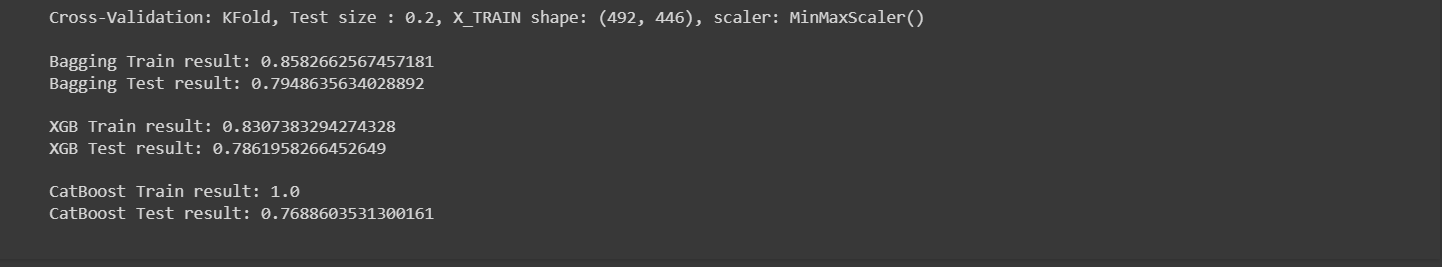

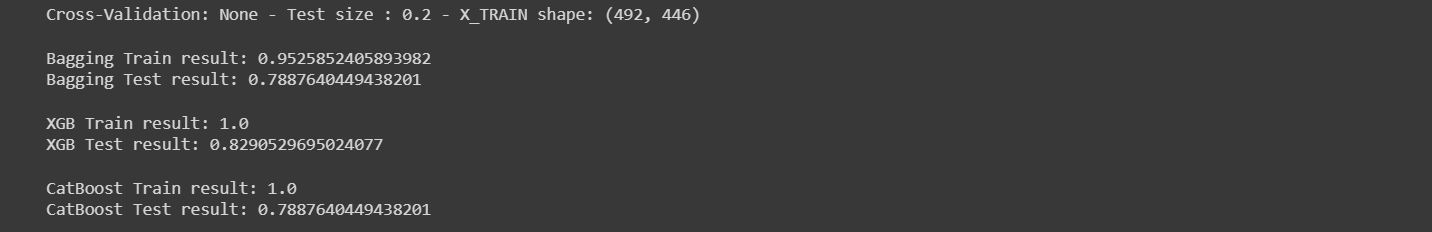

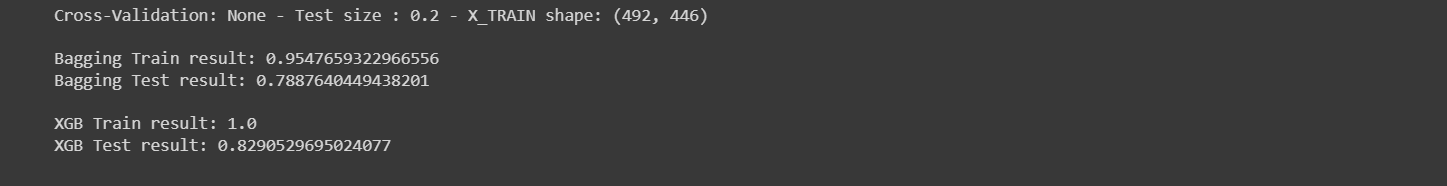

base model - SVC
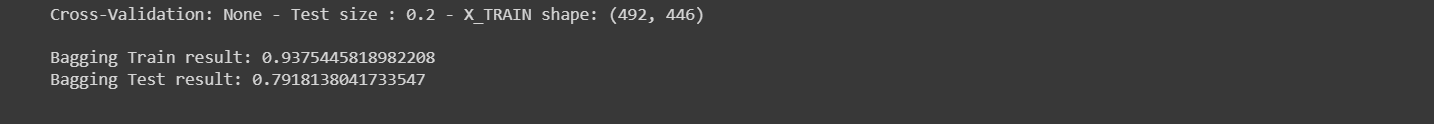

In [ ]:
print(f'Cross-Validation: {Cross_validation}, Test size : {test_size}, X_TRAIN shape: {X_TRAIN.shape}, scaler: {scaler}\n')

print(f'LogisticRegression Train result: {logreg_train_result}')
print(f'LogisticRegression Test result: {logreg_test_result}\n')
print(f"KNN Train result: {knn_train_result}")
print(f"KNN Test reslut {knn_test_result}\n")
print(f"DecisionTree Train result: {tree_train_result}")
print(f"DecisionTree Test reslut {tree_test_result}\n")
print(f"SVC Train result: {svc_train_result}")
print(f"SVC Test reslut {svc_test_result}\n")
# print(f"RandomForest Train result: {forest_train_result}")
# print(f"RandomForest Test reslut {forest_test_result}\n")



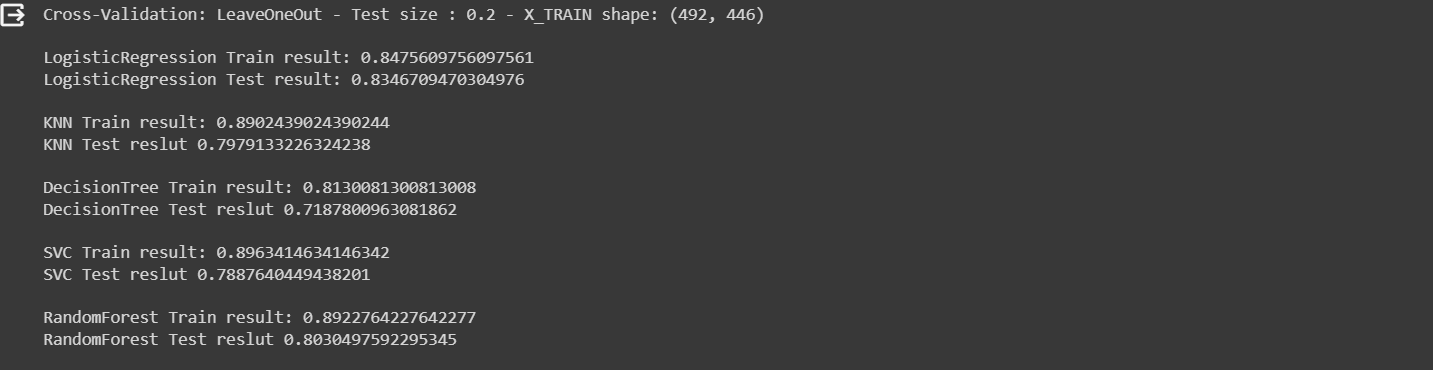

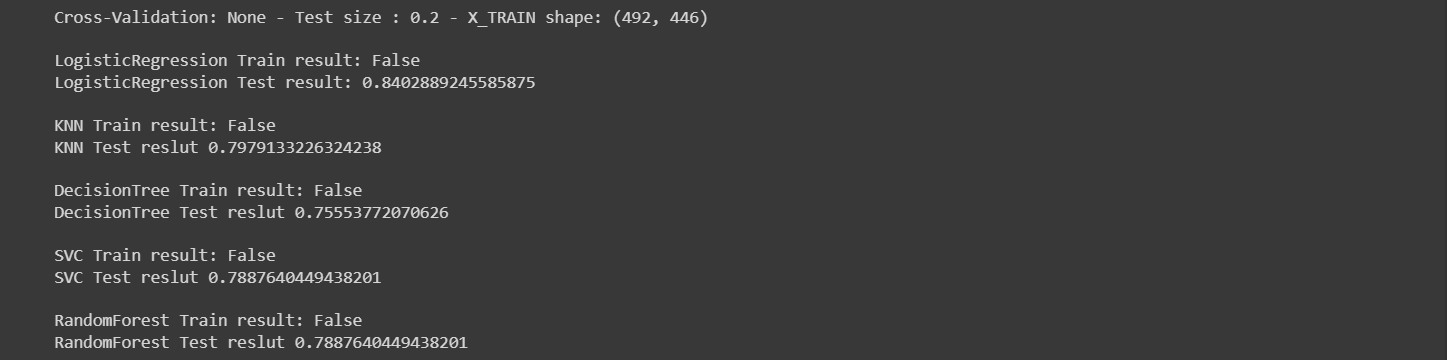

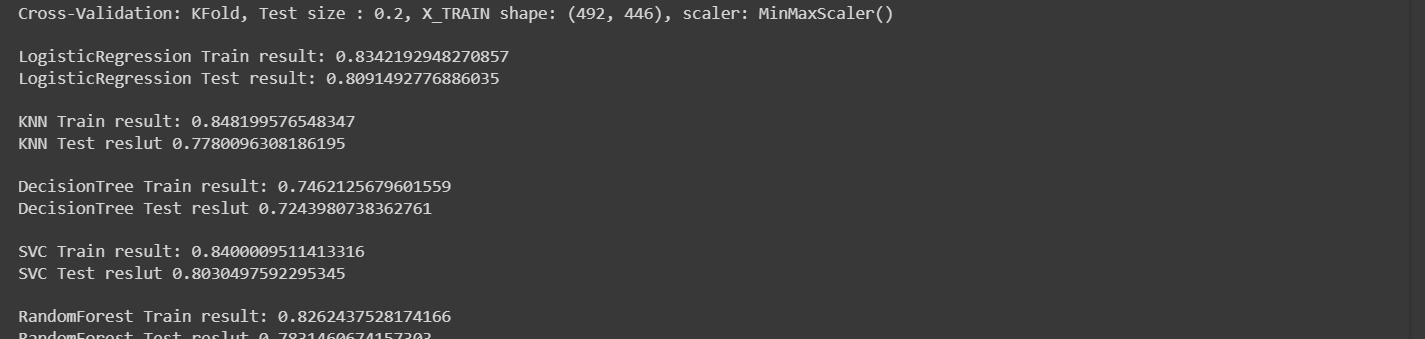

In [ ]:
Final_test = pd.read_csv('trainee_test_fish.csv')

In [ ]:
Final_test.head()
Final_test = Final_test.drop('Unnamed: 0', axis = 1)
Final_test.head()


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v437,v438,v439,v440,v441,v442,v443,v444,v445,v446
0,130.798507,131.174905,129.255102,132.199234,128.746479,130.381148,129.854839,129.828431,129.868526,130.917969,...,128.800985,128.232694,128.211893,128.167519,126.100000,127.709786,127.349282,127.063052,127.825000,126.611554
1,128.100243,128.157072,127.630027,128.273006,130.810403,129.023232,126.769231,126.926295,127.196460,127.433333,...,128.800985,130.794007,127.750000,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
2,128.100243,128.157072,129.255102,128.273006,130.810403,126.042980,129.854839,129.828431,129.868526,128.618063,...,128.800985,130.794007,131.026119,130.512476,130.411160,130.650165,130.904685,131.017268,130.477398,130.496150
3,130.798507,131.174905,129.255102,132.199234,132.860465,130.381148,129.854839,129.828431,129.868526,130.917969,...,126.503759,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,127.825000,126.611554
4,130.798507,131.174905,129.255102,132.199234,130.810403,130.381148,129.854839,129.828431,129.868526,130.917969,...,128.914365,128.232694,128.211893,128.167519,128.051724,127.709786,127.349282,127.063052,125.169118,126.611554


In [ ]:
submission = pd.Series()

<ipython-input-164-618be7da37cf>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  submission = pd.Series()


In [ ]:
submission = LogRegr_trained.predict(Final_test)


In [ ]:
submission_ = pd.Series(submission)

In [ ]:
print(submission_)

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
211    1.0
212    1.0
213    1.0
214    1.0
215    1.0
Length: 216, dtype: float64


In [ ]:
submission_.to_csv('Submission.csv')

In [ ]:
print(sum(submission) / len(submission))

0.7268518518518519


In [ ]:
len(submission)

216